<a href="https://colab.research.google.com/github/akrawat912/Deep-Learning/blob/master/bbc_News_LDA_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files
files.upload()

#### data is on my localhost, you can get data here: https://www.kaggle.com/c/learn-ai-bbc/data
#### then make it unsupervised by dropping target feature since it is supervised multiclassification in real dataset

In [0]:
data=pd.read_csv('BBC train.csv')
documents=data[['Text']]

In [0]:
documents['index']=documents.index

In [4]:
documents[:3]

,Text,index
0,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,1
2,bbc poll indicates economic gloom citizens in ...,2


In [0]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import LdaModel, CoherenceModel
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.corpora import Dictionary
from nltk.stem.porter import *
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2018)

In [0]:
stemmer = SnowballStemmer('english')

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
# example, verb POS of word 'paased' is pass
WordNetLemmatizer().lemmatize('passed', pos='v')

'pass'

### Preprocessing

In [9]:
stemmer.stem('globalization')

'global'

In [0]:
def lemmatize_stemize(text):
    '''reutrns stemized  after lemmatized of word'''
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    '''returns tokenized text after removing stopwords and non stopwords length of less than 3 will be discarded'''
    result=[]
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token)>3:
            result.append(lemmatize_stemize(token))
    return result

In [11]:
# example 
eg='''worldcom ex-boss launches defence lawyers defending former worldcom chief 
bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness'''
preprocess(eg)

['worldcom',
 'boss',
 'launch',
 'defenc',
 'lawyer',
 'defend',
 'worldcom',
 'chief',
 'berni',
 'ebber',
 'batteri',
 'fraud',
 'charg',
 'call',
 'compani',
 'whistleblow',
 'wit']

In [0]:
processed_docs = documents['Text'].map(preprocess)

In [13]:
processed_docs[:5]

0    [worldcom, boss, launch, defenc, lawyer, defen...
1    [german, busi, confid, slide, german, busi, co...
2    [poll, indic, econom, gloom, citizen, major, n...
3    [lifestyl, govern, mobil, choic, faster, bette...
4    [enron, boss, payout, eighteen, enron, directo...
Name: Text, dtype: object

In [0]:
dic=Dictionary(processed_docs)

In [15]:
count=0
for key, value in dic.iteritems():
    print(key, value)
    count+=1
    if count > 10: break

0 account
1 adjust
2 agre
3 alert
4 andersen
5 answer
6 approv
7 argu
8 arthur
9 audit
10 auditor


### Bag of Words on preprocessed documents

In [16]:
#dic.filter_extremes()
bow=[dic.doc2bow(doc) for doc in processed_docs]
bow[0][:10]
# word with token_id 0 appears 7 times in document

[(0, 7),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1)]

### TF-IDF

In [0]:
from gensim import models
tfidf = models.TfidfModel(bow)

In [0]:
corpus_tfidf = tfidf[bow]

In [19]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2230970706404005),
 (1, 0.05808478262058561),
 (2, 0.0312761860906699),
 (3, 0.11328109777342148),
 (4, 0.17174588526816054),
 (5, 0.04515942803354067),
 (6, 0.042375375878963124),
 (7, 0.06963857504481114),
 (8, 0.07160776962633265),
 (9, 0.05970999099195468),
 (10, 0.12747453181390211),
 (11, 0.047302942377266295),
 (12, 0.058871976362783025),
 (13, 0.06787229845321543),
 (14, 0.03444289247127546),
 (15, 0.03456714911371667),
 (16, 0.054159750123973095),
 (17, 0.02544257038084304),
 (18, 0.07397516399970232),
 (19, 0.022227503720700488),
 (20, 0.08917587194902346),
 (21, 0.07145208602842192),
 (22, 0.05028390223179893),
 (23, 0.039523559874261587),
 (24, 0.04332013572506785),
 (25, 0.03769358992787368),
 (26, 0.06260744753590024),
 (27, 0.04332013572506785),
 (28, 0.05114987105916515),
 (29, 0.2238980792753499),
 (30, 0.08587294263408027),
 (31, 0.02507677942997257),
 (32, 0.041283580141366516),
 (33, 0.03383884309170826),
 (34, 0.024897677003576164),
 (35, 0.0649748419092699)

### Hyperparameter tuning for optimal no. of Topics using Coherence score
#### I) LDA using BOW

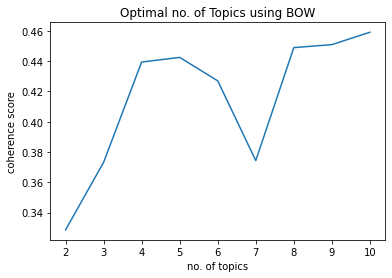

In [24]:
score=[]
model_list=[]
for topic in range(2, 11):
    model = LdaModel(corpus=bow, num_topics=topic, id2word=dic, passes=10, iterations=100)
    cohe = CoherenceModel(model=model, texts=processed_docs)
    model_list.append(model)
    score.append(cohe.get_coherence())
plt.plot(range(2, 11), score)
plt.xlabel('no. of topics')
plt.ylabel('coherence score')
plt.title('Optimal no. of Topics using BOW')
plt.show()

#### II) LDA using TF-IDF

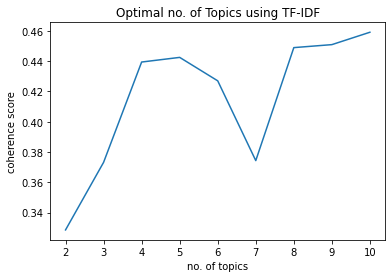

In [25]:
score2=[]
model_list2=[]
for topic in range(2, 11):
    model = LdaModel(corpus=bow, num_topics=topic, id2word=dic, passes=10, iterations=100)
    cohe = CoherenceModel(model=model, texts=processed_docs)
    model_list2.append(model)
    score2.append(cohe.get_coherence())
plt.plot(range(2, 11), score)
plt.xlabel('no. of topics')
plt.ylabel('coherence score')
plt.title('Optimal no. of Topics using TF-IDF')
plt.show()

##### Both plots (using BOW and TF-IDF) showing optimal no. of topics can be 5, since after 5 score is decreasing but after 8 score is increasing(may have repeated keywords in the topic)

In [28]:
score, score2
# we see for no. of topics 5, model using TF-IDF giving better score(0.50 index 3) than BOW

([0.32850393813556655,
  0.37313592757927516,
  0.4393902903309851,
  0.4424569737201323,
  0.4269757631650624,
  0.3742851883869219,
  0.44890992029089016,
  0.45088456598120313,
  0.459066027535155],
 [0.3553790715232775,
  0.3629271347314767,
  0.38546632947327975,
  0.5092235901321011,
  0.4377754089301454,
  0.4535016537575491,
  0.4349313705524118,
  0.4780362144965613,
  0.4783431347284221])

In [31]:
score2[3]

0.5092235901321011

In [0]:
# we get highest coherence score 0.50 with no. of topics 5 using TF-IDF
lda_model=model_list2[3]

In [33]:
for idx, topic in lda_model.print_topics(-1, 15):
    print('Topic {} : Words : {}'.format(idx, topic))

Topic 0 : Words : 0.027*"say" + 0.009*"govern" + 0.008*"year" + 0.007*"elect" + 0.006*"labour" + 0.006*"parti" + 0.006*"minist" + 0.006*"plan" + 0.005*"peopl" + 0.005*"blair" + 0.004*"countri" + 0.004*"tori" + 0.004*"tell" + 0.004*"economi" + 0.004*"brown"
Topic 1 : Words : 0.012*"game" + 0.010*"say" + 0.008*"play" + 0.007*"england" + 0.007*"time" + 0.006*"player" + 0.006*"club" + 0.005*"year" + 0.005*"team" + 0.004*"half" + 0.004*"ireland" + 0.004*"come" + 0.004*"wale" + 0.004*"match" + 0.004*"go"
Topic 2 : Words : 0.020*"film" + 0.014*"say" + 0.010*"best" + 0.009*"award" + 0.008*"star" + 0.008*"year" + 0.006*"actor" + 0.005*"includ" + 0.005*"director" + 0.005*"oscar" + 0.004*"nomin" + 0.004*"play" + 0.004*"time" + 0.004*"take" + 0.003*"movi"
Topic 3 : Words : 0.021*"say" + 0.008*"peopl" + 0.007*"year" + 0.006*"firm" + 0.006*"mobil" + 0.006*"compani" + 0.005*"phone" + 0.005*"servic" + 0.005*"technolog" + 0.005*"market" + 0.004*"like" + 0.004*"share" + 0.004*"game" + 0.004*"month" + 0.

### Visualization

In [34]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.9MB/s 
     |████████████████████████████████| 552kB 38.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7b72e11a27bb42ce24c51b228d2723442df54bad7108fe272af1a97782edfa77
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=4088985489dd479a91a2dea225460d3a1e90c0e7ea13c0fd1225f09603d10e13
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [36]:
pyLDAvis.gensim.prepare(lda_model, bow, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.111014 -0.075893       1        1  29.701122
3     -0.107675  0.000622       2        1  29.679697
1      0.150037 -0.094740       3        1  15.393562
4      0.034076  0.044324       4        1  13.905244
2      0.034577  0.125686       5        1  11.320373, topic_info=        Term        Freq        Total Category  logprob  loglift
373     film  749.000000   749.000000  Default  30.0000  30.0000
558     game  991.000000   991.000000  Default  29.0000  29.0000
1952   elect  570.000000   570.000000  Default  28.0000  28.0000
1055    best  573.000000   573.000000  Default  27.0000  27.0000
158   labour  512.000000   512.000000  Default  26.0000  26.0000
...      ...         ...          ...      ...      ...      ...
331    world   81.376328   761.907227   Topic5  -5.9099  -0.0582
143       go   79.456894   711.975952   Topic5  -5.9338  -0.0143
571     like   78.261444   768.784790   Topic5  -5.9489  -0.1062
283    peopl   78.365829  1281.185547   Topic5  -5.9476  -0.6156
614     come   67.785507   739.131958   Topic5  -6.0926  -0.2106

[404 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5439      1  0.016088  academi
5439      2  0.016088  academi
5439      3  0.016088  academi
5439      4  0.096531  academi
5439      5  0.868777  academi
...     ...       ...      ...
102       4  0.218033     year
102       5  0.118794     year
1692      1  0.024870     yuko
1692      2  0.936761     yuko
1692      5  0.033160     yuko

[1096 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])

In [0]:
## wordcloud of each topic for top N keywords
from wordcloud import WordCloud, STOPWORDS
cloud=WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                 prefer_horizontal=1.0)

In [0]:
topics=lda_model.show_topics(formatted=False, num_words=15)

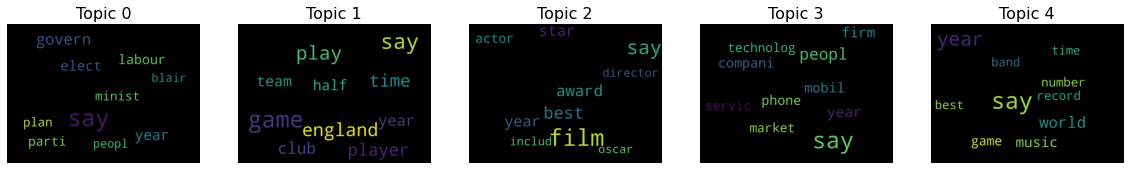

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,5,figsize=(20,30), sharex=True, sharey=True)
for i, ax in enumerate(ax.flatten()):
  fig.add_subplot(ax)
  topic_words=dict(topics[i][1])
  cloud.generate_from_frequencies(topic_words, max_font_size=300)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

#### Manual way to assign topics based on most occured words with real world NEWS category. Efficient for less topics where categories are distinct to each other.

In [0]:
## Topic 0 contains: govern, plan, elect, minist(ministery) looks POLITICS category
## Topic 1 contains most frequent words like: play, game, world, team,, player looks SPORTS category
## Topic 2 contains: film, award, star, best, actor, oscar looks FILM/ENTERTAINMENT category
## Topic 3 contains: compni, technolog, phone, firm, music, service, looks TECHNOLOGY category
## Topic 4 contains: can't derive any category based on these words, lets say OTHER category

In [0]:
# Testing on unseen document
test_doc='''software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled. 
 worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. 
 but privacy advocates are concerned by the invasive nature of such software.  
 the system is a joint venture between security firm 3ami and storage specialists bridgehead software. 
 they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes.
  more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 80% of medium and large companies have been victims of some form of cyber-crime. bridgehead software has come up with techniques to prove  to a legal standard  that any stored file on a pc has not been tampered with. ironically the impetus for developing the system came as a result of the freedom of information act  which requires companies to store all data for a certain amount of time. 
   the storage system has been incorporated into an application developed by security firm 3ami which allows every action on a computer to be logged. potentially it could help employers to follow the trail of stolen files and pinpoint whether they had been emailed to a third party  copied  printed  deleted or saved to cd  floppy disk  memory stick or flash card. other activities the system can monitor include the downloading of pornography  the use of racist or bullying language or the copying of applications for personal use. increasingly organisations that handle sensitive data  such as governments  are using biometric log-ins such as fingerprinting to provide conclusive proof of who was using a particular machine at any given time. privacy advocates are concerned that monitoring at work is not only damaging to employee s privacy but also to the relationship between employers and their staff.  that is not the case   said tim ellsmore  managing director of 3ami.  it is not about replacing dialogue but there are issues that you can talk through but you still need proof   he said.  
people need to recognise that you are using a pc as a representative of a company and that employers have a legal requirement to store data   he added.'''

# looks TECHNOLOGY news

In [0]:
test_bow=dic.doc2bow(preprocess(test_doc))

In [42]:
lda_model[test_bow]
# Wowwwwwwww! has topic 3 (97%) as we stated above topic 3 might be TECHNOLOGY

[(0, 0.024676377), (3, 0.97243786)]

In [0]:
test_doc2='''career honour for actor dicaprio actor leonardo dicaprio s  exceptional career  has been honoured at 
the santa barbara international film festival.  the star was presented with the award by martin scorsese  
who directed him in oscar-nominated movie the aviator.  it s a lifetime achievement award  which is completely and 
utterly surreal  given i m only 30 years old   dicaprio said.  but what has it been  almost 17 years now. 
i ve done quite a few films.  a retrospective of his movies was shown.   
what s really exciting  for me  is that this is what i really love doing he added.'''
# looks ENTERTAINMENT news

In [44]:
test_bow2 = dic.doc2bow(preprocess(test_doc2))
lda_model[test_bow2]
## Topic 2 is really ENTERTAINMENT (we stated) and this news also 89% fall in that

[(2, 0.89669526), (4, 0.0898146)]

#### When we have large categories to map then we can use Naive-ways-for-automatic-labelling-of-topic-models using WIKIAPI 

follow this: http://chappers.github.io/web%20micro%20log/2017/02/12/naive-ways-for-automatic-labelling-of-topic-models/